# Analisis eskplorasi data Titanic

Di Notebook ini, akan dilakukan untuk menganalisis data Titanic yang terkenal dari Kaggle. Dataset digunakan untuk pembelajaran Machine Learning yang teramati, tetapi kami hanya akan melakukan analisis eskplorasi pada tahap ini.

kami akan mencoba menjawab pertanyaan berikut

* Siapa saja penumpang Titanic? (usia, jenis kelamin, kelas .. dll)
* Di dek mana penumpang berada dan bagaimana hubungannya dengan kelas mereka?
* Dari mana asal penumpang?
* Siapa yang sendirian dan siapa yang bersama keluarga?
* Faktor apa yang membantu seseorang selamat dari tenggelamnya?

In [ ]:


import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#mount google drive karena menggunakan google collab
from google.colab import drive
drive.mount('/content/drive')

#dataset titanic tersedia di Kaggle
xpath = "/content/drive/MyDrive/csv/titanic_train.csv"
titanic_df = pd.read_csv(xpath)

Mounted at /content/drive


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#informasi dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


dari informasi diatas, terlihat bahwa dataset tersebut kehilangan banyak informasi tentang cabin, tepatnya dikolom cabin. informasi lain terlihat lengkap kecuali beberapa data usia.

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Angka 1 di kolom Survived menandakan penumpang yang selamat, sedangkan angka 0 menandakan mereka telah tewas. jadi melihat dari nilai rata-ratanya terdapat hanya 38% penumpang yang selamat dari tenggelamnya kapal.

## Siapa saja penumpang Kapal Titanic?

Mari kita lihat beberapa informasi demogeraphis tentang penumpang.

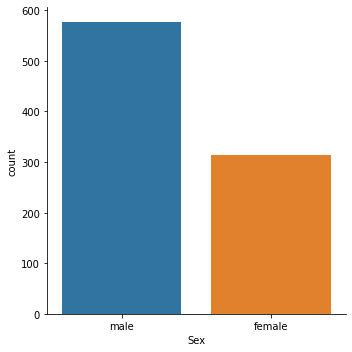

In [ ]:
#membuat factorplot lalu memetakan jumlah penumpang pria dan wanita
sns.catplot(x='Sex',data=titanic_df,kind='count')

Seperti biasa, penumpang pria selalu lebih banyak dibanding perempuan yang berada didalam kabin.
Mari kita lihat bagaimana penumpang dibagi antara kelas yang berbeda.

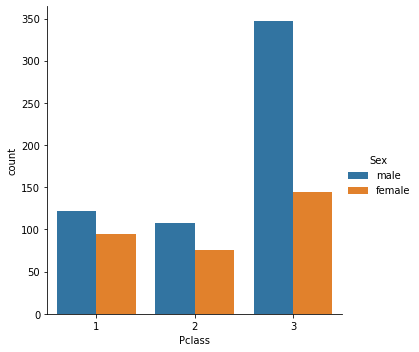

In [ ]:
sns.catplot(x='Pclass',data=titanic_df,hue='Sex',kind='count')

Hal lain yang bisa dapat kita lakukan sebelum kita mulai menyimpulkan sesuatu dari plot faktor di atas, adalah membagi penumpang antara laki-laki, perempuan, dan anak anak

In [ ]:
#fungsi untuk mendeteksi jika penumpang adalah laki-laki, perempuan atau anak-anak
def man_wom_chi(passenger):
    age=passenger['Age']
    sex=passenger['Sex']
    
    return 'child' if age < 16 else sex

#memakai pandas untuk memakai fungsi untuk membuat kolom 'person'
titanic_df['Person'] = titanic_df.apply(man_wom_chi,axis=1)

In [ ]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [ ]:
#Mendapatkan jumlah penumpang sebenarnya
print(titanic_df['Person'].value_counts())

male      537
female    271
child      83
Name: Person, dtype: int64


Selanjutnya, Membuat factorplot untuk menganalisis distribusi penupang laki-laki, perempuan dan anak-anak diantara kelas kabin.

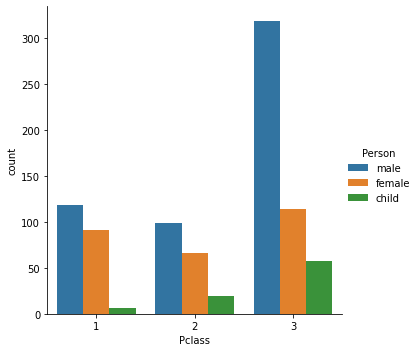

In [ ]:
sns.catplot(x='Pclass',data=titanic_df,hue='Person',kind='count')

Lalu, kita dapat membuat histogram dari dataset, untuk menganallisis distribusi pengelompokan penumpang berdasarkan umur penumpang.

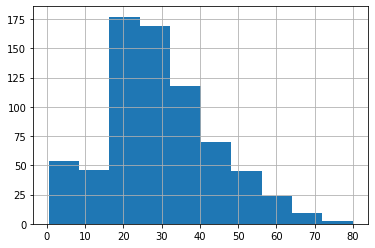

In [ ]:
titanic_df['Age'].hist()

Mari memeriksa bagaimana distribusi variasi umur untuk perbedaan kelas kabin, kita dapat memakai Seaborn's Facegrid untuk ini.

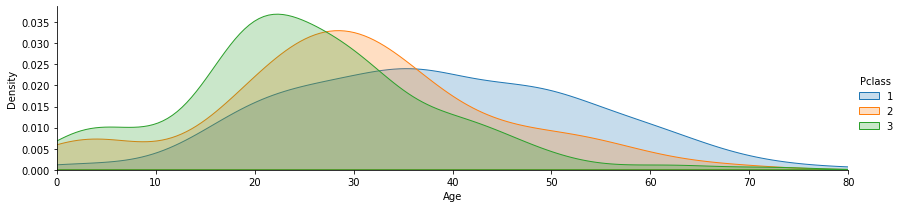

In [ ]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

Dari sini kita dapat melihat bahwa penumpang kabin kelas 1 lebih banyak berasal dari kelompok menengah dan anak-anak sangat sedikit.

Kabin kelas 2 dan kabin kelas 3 memiliki banyak anak dan orang tua yang relatif lebih sedikit.

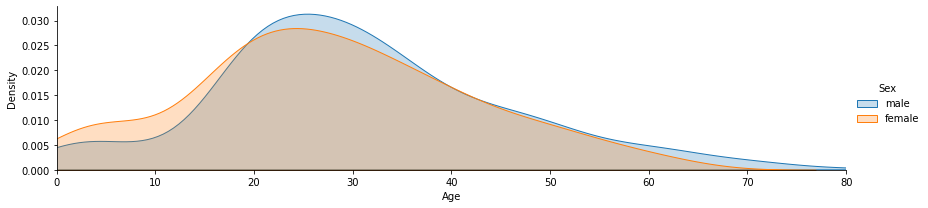

In [ ]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

Distribusi usia terlihat kurang bervariasi dalam hal penumpang pria dan perempuan, meskipun dapat dikatakan lebih banyak perempuan muda dibanding pria yang lebih muda.

# Di dek mana penumpang berada dan bagaimana hubungannya dengan kelas mereka?
mari kita coba dengan memeriksa apakah orang-orang dari kelas yang lebih tinggi ditugaskan di dek kapal yang lebih tinggi.

In [ ]:
#karena data kabin banyak yang tidak ada, maka kita dapat menghapus itu untuk bagian ini
deck_df = titanic_df.dropna(axis=0)

In [ ]:
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female


Bagaimana kita mengetahui dek mana yang ditugas kan kepada penumpang?

atribut cabin menyimpan data tersebut secara perseptif. nomor kabin penumpang adalah kombinasi dari tempat dek mereka berada dan nomor kamar mereka. Jadi penumpang di dek 'C' akan memiliki format CXXX  dimana XXX bisa dijadikan nomor kamar.

kita dapat menggunakan metode python untuk mengestrak karakter pertama dari informasi kabin.

In [ ]:
#mengambil data dek dari nomor Cabin
def get_level(passenger):
    cabin = passenger['Cabin']
    return cabin[0]

In [ ]:
deck_df['level']=deck_df.apply(get_level,axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,level
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,C


Sekarang kita dapat memeriksa berapa penumpang yang berada di dek yang berbeda.

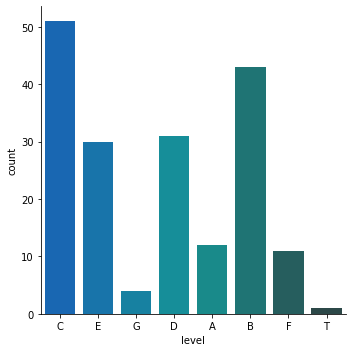

In [ ]:
sns.catplot(x='level',data=deck_df,palette='winter_d',kind='count')

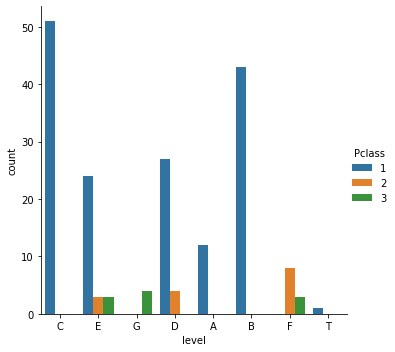

In [ ]:
sns.catplot(x='level',data=deck_df,hue='Pclass',kind='count')

Terlihat penumpang kelas atas memang ditempatkan di dek atas, Dek A,B dan C hanya diperuntukkan bagi penumpang kelas satu dan kita dapat melihat penumpang kelas 3 hanya terdapat di level E. Namun, tetap saja informasi kabin telah hilang lebih dari 3/4 dataset penumpang

# Darimana penumpang berasal?
atribut Embarked berisi data untuk pelabuhan tempat pemberangkatan penumpang (C = Cherbourg; Q = Queenstown; S = Southampton).

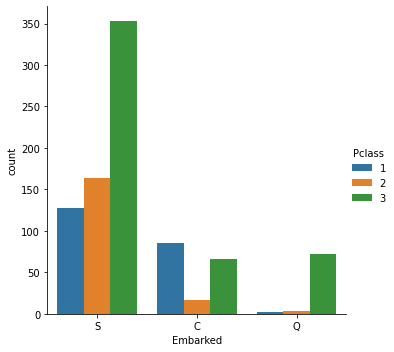

In [ ]:
sns.catplot(x='Embarked',data=titanic_df,hue='Pclass',kind='count')

Sebagian besar penumpang berangkat dari Southampton, yang menarik adalah terdapat sedikit penumpang kelas 1 yang berangkat dari Queenstowns, yang dapat memberi tahu kita tentang status  sosial ekonomi penduduk Queenstowns.

# Siapa saja penumpang yang bersama keluarganya?


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Atribut SibSp mengacu pada jumlah saudara kandung atau pasangan yang dimiliki penumpang. Parch mengacu pada jumlah orang tua atau anak yang dimiliki seorang dikapal.

karena kita hanya mencoba untuk mengetahui apakah penumpang memiliki seorang dari keluarganya, kita dapat membuatnya lebih mudah dengan membuat kolom lain untuk mewakili data ini.

In [ ]:
#Menambah jumlah keluarga yang penumpang punya di dek
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [ ]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,male,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,female,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,female,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,male,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,male,0


Selama diatas 0 yang dikolom Alone menandakan penumpang tersebut tidak sendirian, setelah ini kita mendefinikan kolom alone dengan lebih tepat.

In [ ]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'No'

titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Yes'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Yes


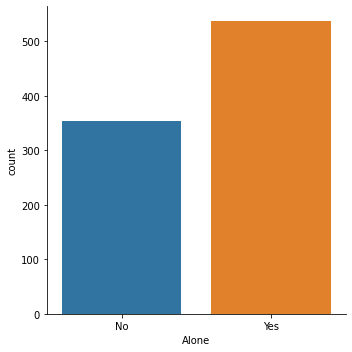

In [ ]:
sns.catplot(x='Alone',data=titanic_df,kind='count')

Dengan ini menandakan mayoritas penumpang memiliki anggota keluarga lain dikapal.

# Apa saja faktor-faktor yang menyelamatkan seorang selamat dari tenggelam?

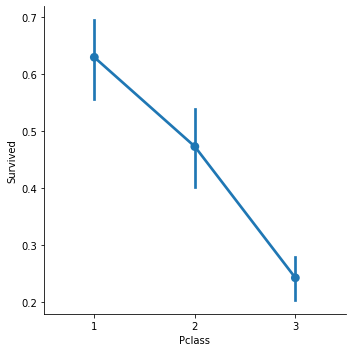

In [ ]:
sns.catplot(x='Pclass',y='Survived',data=titanic_df,kind='point')

Tidak terlalu mengejutkan, dari yang terlihat, penumpang kelas bawah mempunyai peluang bertahan hidup lebih rendah dibangdingkan dengan yang kelas menengah dan kelas tinggi.

Setelah ini mari kita lihat lebih banyak pria,wanita atau anak-anak yang selamat dari bencana ini.

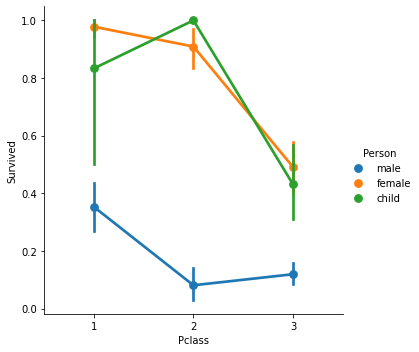

In [ ]:
sns.catplot(x='Pclass',y='Survived',hue='Person',data=titanic_df, kind='point')

Dengan ini dapat disimpulkan bahwa pria memiliki peluang selamat lebih rendah dari wanita atau anak-anak karena mereka lebih diprioritaskan untuk diselamatkan.
mari kita lihat relasi antara umur dan keselamatan.

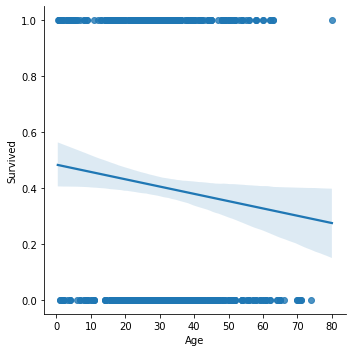

In [ ]:
sns.lmplot(x='Age',y='Survived',data=titanic_df)

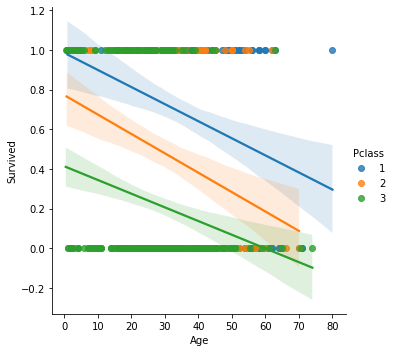

In [ ]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df)

Dari konsensus umum dari 2 angka diatas terlihat orang yang lebih tua kecil kemungkinanya untuk bertahan hidup.

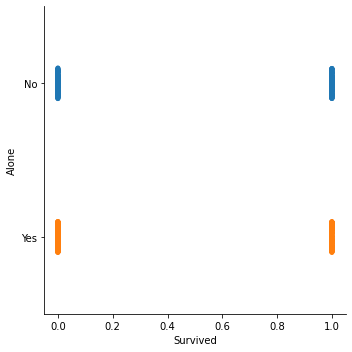

In [ ]:
sns.catplot(x='Survived',y='Alone',data=titanic_df)

Dan jika anda Mengenal seorang di kapal, anda mempunyai kesempatan lebih tinggi untuk bertahan hidup, daripada sendiri.